<a href="https://colab.research.google.com/github/DaVOVAN/MO_Trefilov/blob/main/laba2_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ucimlrepo

In [ ]:
# Импортируем библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
support2 = fetch_ucirepo(id=880)

# data (as pandas dataframes)
X = support2.data.features
y = support2.data.targets

# metadata
print(support2.metadata)

# variable information
print(support2.variables)

{'uci_id': 880, 'name': 'SUPPORT2', 'repository_url': 'https://archive.ics.uci.edu/dataset/880/support2', 'data_url': 'https://archive.ics.uci.edu/static/public/880/data.csv', 'abstract': "This dataset comprises 9105 individual critically ill patients across 5 United States medical centers, accessioned throughout 1989-1991 and 1992-1994.\nEach row concerns hospitalized patient records who met the inclusion and exclusion criteria for nine disease categories: acute respiratory failure, chronic obstructive pulmonary disease, congestive heart failure, liver disease, coma, colon cancer, lung cancer, multiple organ system failure with malignancy, and multiple organ system failure with sepsis. The goal is to determine these patients' 2- and 6-month survival rates based on several physiologic, demographics, and disease severity information. \nIt is an important problem because it addresses the growing national concern over patients' loss of control near the end of life. It enables earlier deci

In [ ]:
X.isnull().sum()

age            0
sex            0
dzgroup        0
dzclass        0
num.co         0
edu         1634
income      2982
scoma          1
charges      172
totcst       888
totmcst     3475
avtisst       82
race          42
sps            1
aps            1
surv2m         1
surv6m         1
hday           0
diabetes       0
dementia       0
ca             0
prg2m       1649
prg6m       1633
dnr           30
dnrday        30
meanbp         1
wblc         212
hrt            1
resp           1
temp           1
pafi        2325
alb         3372
bili        2601
crea          67
sod            1
ph          2284
glucose     4500
bun         4352
urine       4862
adlp        5641
adls        2867
adlsc          0
dtype: int64

In [ ]:
X.alb.fillna(3.5, inplace=True)
X.pafi.fillna(333.3, inplace=True)
X.bili.fillna(1.01, inplace=True)
X.crea.fillna(1.01, inplace=True)
X.bun.fillna(6.51, inplace=True)
X.wblc.fillna(9, inplace=True)
X.urine.fillna(2502, inplace=True)
X.edu.fillna(X['edu'].mean(), inplace=True)
X.totcst.fillna(X['totcst'].mean(), inplace=True)
X.income.fillna('under $11k', inplace=True)
X.drop(['totmcst', 'ph', 'glucose', 'adlp', 'adls'], axis=1, inplace=True)

<ipython-input-27-30e1663eb134>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X.alb.fillna(3.5, inplace=True)
<ipython-input-27-30e1663eb134>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.alb.fillna(3.5, inplace=True)
<ipython-input-27-30e1663eb134>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series throug

In [ ]:
X.drop(['dzgroup', 'edu', 'income', 'charges', 'totcst', 'avtisst', 'surv2m', 'surv6m', 'hday', 'prg2m', 'prg6m', 'dnrday', 'sps', 'aps', 'dementia', 'dnr'], axis=1, inplace=True)

<ipython-input-28-505694f385fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(['dzgroup', 'edu', 'income', 'charges', 'totcst', 'avtisst', 'surv2m', 'surv6m', 'hday', 'prg2m', 'prg6m', 'dnrday', 'sps', 'aps', 'dementia', 'dnr'], axis=1, inplace=True)


In [ ]:
X = X.dropna()

In [ ]:
X.shape

(9061, 21)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9061 entries, 0 to 9104
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       9061 non-null   float64
 1   sex       9061 non-null   object 
 2   dzclass   9061 non-null   object 
 3   num.co    9061 non-null   int64  
 4   scoma     9061 non-null   float64
 5   race      9061 non-null   object 
 6   diabetes  9061 non-null   int64  
 7   ca        9061 non-null   object 
 8   meanbp    9061 non-null   float64
 9   wblc      9061 non-null   float64
 10  hrt       9061 non-null   float64
 11  resp      9061 non-null   float64
 12  temp      9061 non-null   float64
 13  pafi      9061 non-null   float64
 14  alb       9061 non-null   float64
 15  bili      9061 non-null   float64
 16  crea      9061 non-null   float64
 17  sod       9061 non-null   float64
 18  bun       9061 non-null   float64
 19  urine     9061 non-null   float64
 20  adlsc     9061 non-null   float64
d

In [ ]:
X.describe()

age       num.co        scoma     diabetes       meanbp  \
count  9061.000000  9061.000000  9061.000000  9061.000000  9061.000000   
mean     62.651290     1.869992    12.039841     0.195674    84.599216   
std      15.596948     1.345209    24.611957     0.396740    27.680395   
min      18.041990     0.000000     0.000000     0.000000     0.000000   
25%      52.807980     1.000000     0.000000     0.000000    63.000000   
50%      64.878970     2.000000     0.000000     0.000000    77.000000   
75%      73.992980     3.000000     9.000000     0.000000   107.000000   
max     101.847960     9.000000   100.000000     1.000000   195.000000   

              wblc          hrt         resp         temp         pafi  \
count  9061.000000  9061.000000  9061.000000  9061.000000  9061.000000   
mean     12.274983    97.146198    23.326344    37.104077   263.563545   
std       9.168781    31.522666     9.572876     1.251312   103.121378   
min       0.000000     0.000000     0.000000    31.699220    12.000000   
25%       7.000000    72.000000    18.000000    36.195310   180.000000   
50%      10.398438   100.000000    24.000000    36.695310   276.625000   
75%      15.099609   120.000000    28.000000    38.195310   333.300000   
max     200.000000   300.000000    90.000000    41.695310   890.375000   

               alb         bili         crea          sod          bun  \
count  9061.000000  9061.000000  9061.000000  9061.000000  9061.000000   
mean      3.153596     2.112311     1.763337   137.564949    20.000907   
std       0.744291     4.550465     1.680009     6.031860    23.257575   
min       0.399963     0.099991     0.099991   110.000000     1.000000   
25%       2.699707     0.599976     0.899902   134.000000     6.510000   
50%       3.500000     1.010000     1.199951   137.000000     6.510000   
75%       3.500000     1.299805     1.899902   141.000000    24.000000   
max      29.000000    63.000000    21.500000   181.000000   300.000000   

             urine        adlsc  
count  9061.000000  9061.000000  
mean   2357.817004     1.884798  
std    1006.425699     2.005666  
min       0.000000     0.000000  
25%    2075.000000     0.000000  
50%    2502.000000     1.000000  
75%    2502.000000     3.000000  
max    9000.000000     7.073242

In [ ]:
X['dzclass'].unique()

array(['Cancer', 'COPD/CHF/Cirrhosis', 'ARF/MOSF', 'Coma'], dtype=object)

In [ ]:
X['dzclass'].value_counts()

dzclass
ARF/MOSF              4202
COPD/CHF/Cirrhosis    2854
Cancer                1413
Coma                   592
Name: count, dtype: int64

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

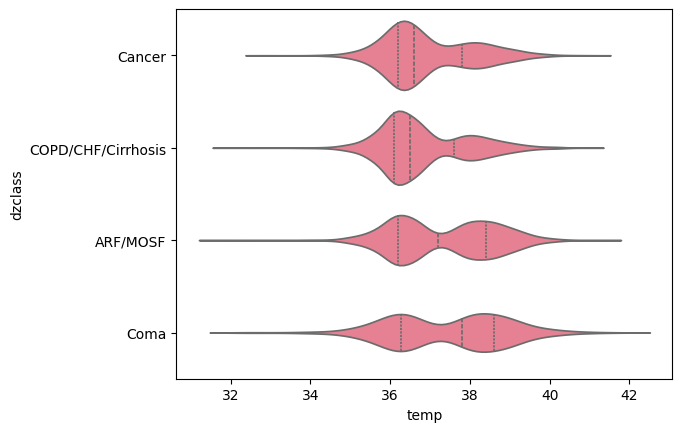

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

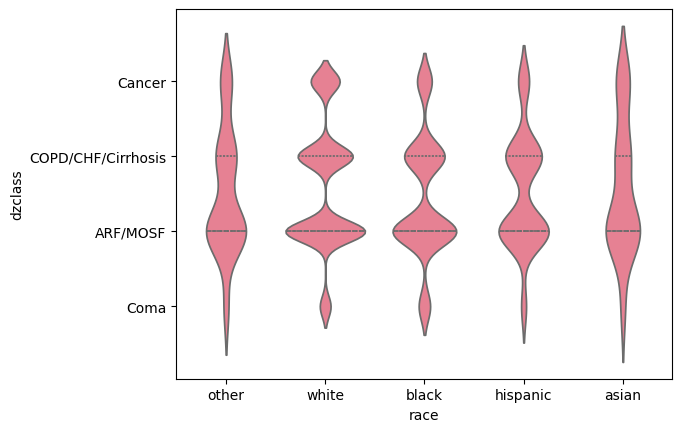

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

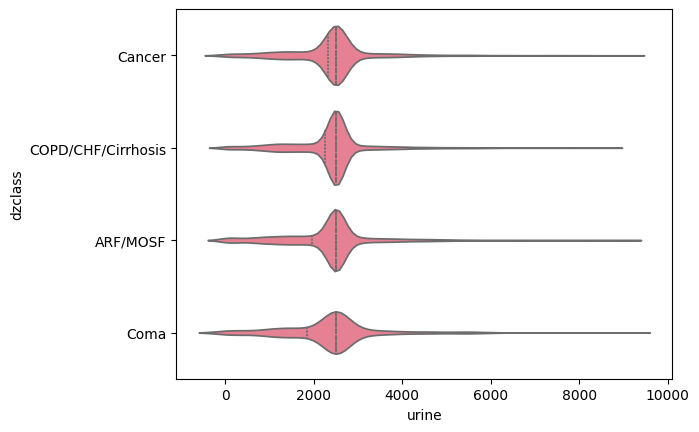

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

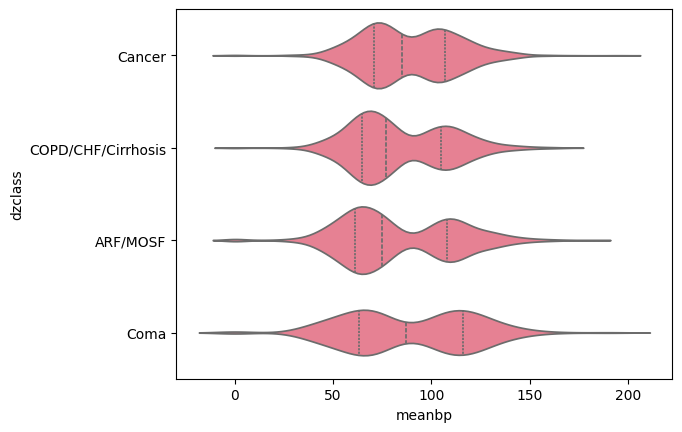

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

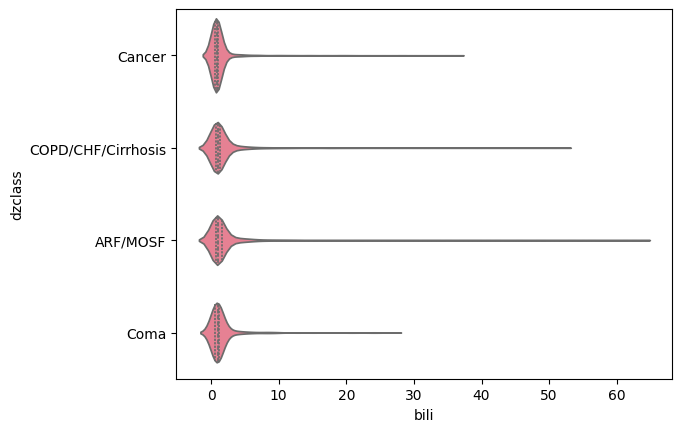

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

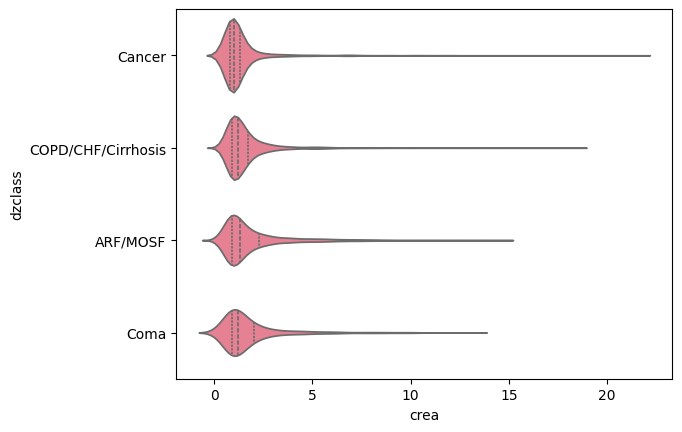

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

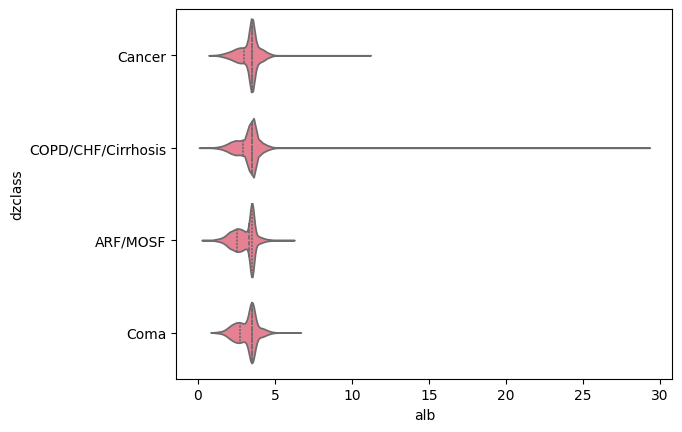

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

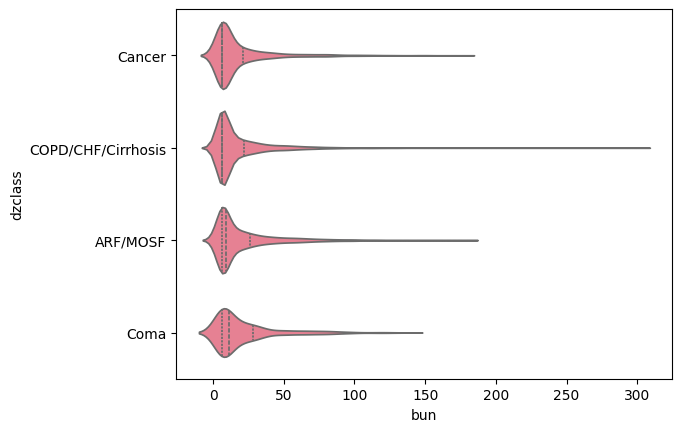

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

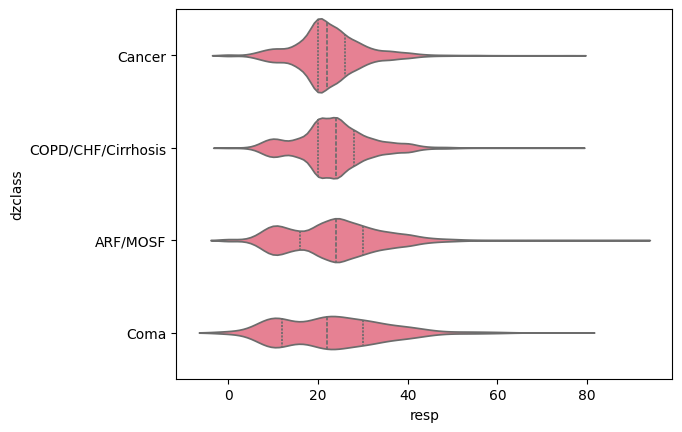

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

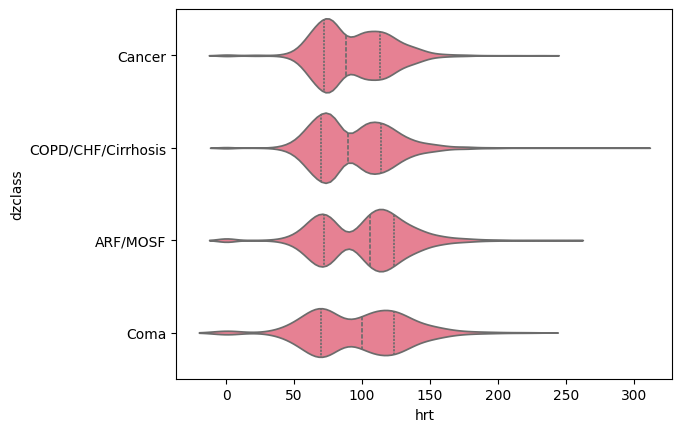

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


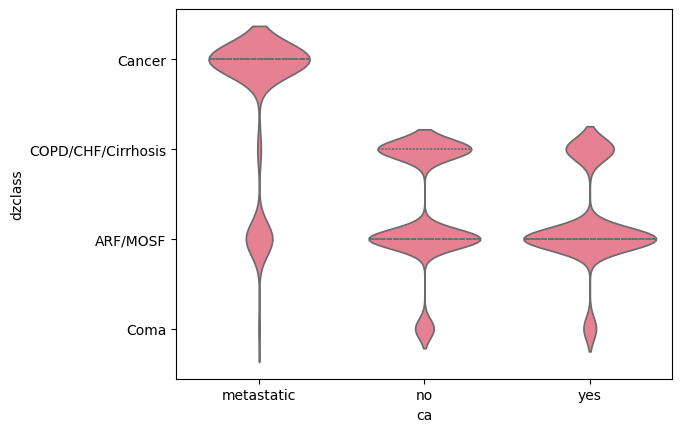

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

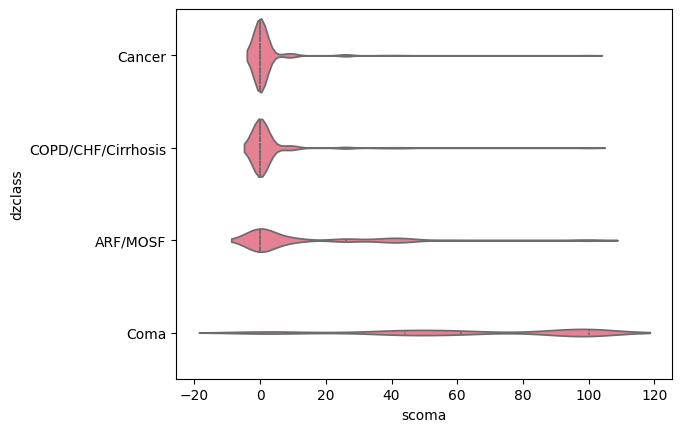

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

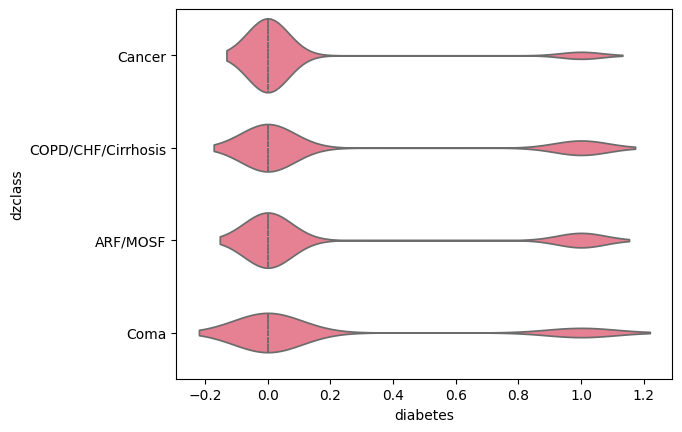

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

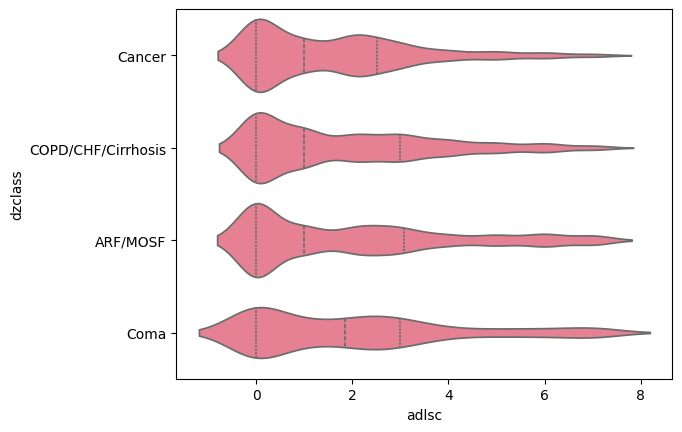

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

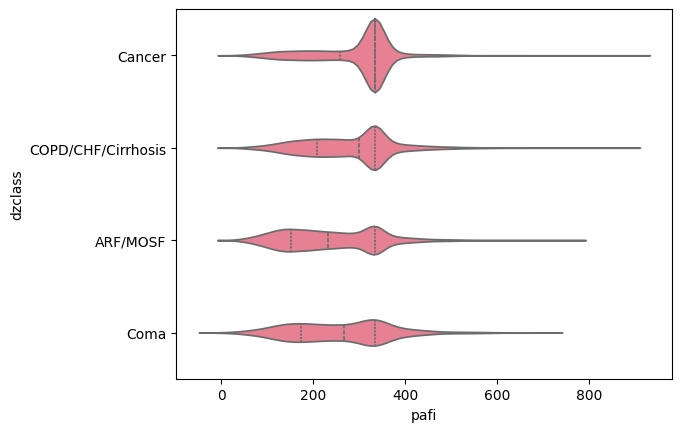

In [ ]:
sns.violinplot(y='dzclass', x='temp', data=X, inner='quartile')
plt.show()
sns.violinplot(y='dzclass', x='race', data=X, inner='quartile')
plt.show()
sns.violinplot(y='dzclass', x='urine', data=X, inner='quartile')
plt.show()
sns.violinplot(y='dzclass', x='meanbp', data=X, inner='quartile')
plt.show()
sns.violinplot(y='dzclass', x='bili', data=X, inner='quartile')
plt.show()
sns.violinplot(y='dzclass', x='crea', data=X, inner='quartile')
plt.show()
sns.violinplot(y='dzclass', x='alb', data=X, inner='quartile')
plt.show()
sns.violinplot(y='dzclass', x='bun', data=X, inner='quartile')
plt.show()
sns.violinplot(y='dzclass', x='resp', data=X, inner='quartile')
plt.show()
sns.violinplot(y='dzclass', x='hrt', data=X, inner='quartile')
plt.show()
sns.violinplot(y='dzclass', x='ca', data=X, inner='quartile')
plt.show()
sns.violinplot(y='dzclass', x='scoma', data=X, inner='quartile')
plt.show()
sns.violinplot(y='dzclass', x='diabetes', data=X, inner='quartile')
plt.show()
sns.violinplot(y='dzclass', x='adlsc', data=X, inner='quartile')
plt.show()
sns.violinplot(y='dzclass', x='pafi', data=X, inner='quartile')
plt.show()

In [ ]:
X.head()

age     sex             dzclass  num.co  scoma   race  diabetes  \
0  62.84998    male              Cancer       0    0.0  other         0   
1  60.33899  female  COPD/CHF/Cirrhosis       2   44.0  white         0   
2  52.74698  female  COPD/CHF/Cirrhosis       2    0.0  white         0   
3  42.38498  female              Cancer       2    0.0  white         0   
4  79.88495  female            ARF/MOSF       1   26.0  white         0   

           ca  meanbp       wblc  ...  resp      temp       pafi       alb  \
0  metastatic    97.0   6.000000  ...  22.0  36.00000  388.00000  1.799805   
1          no    43.0  17.097656  ...  34.0  34.59375   98.00000  3.500000   
2          no    70.0   8.500000  ...  28.0  37.39844  231.65625  3.500000   
3  metastatic    75.0   9.099609  ...  32.0  35.00000  333.30000  3.500000   
4          no    59.0  13.500000  ...  20.0  37.89844  173.31250  3.500000   

       bili      crea    sod   bun   urine  adlsc  
0  0.199982  1.199951  141.0  6.51  2502.0    7.0  
1  1.010000  5.500000  132.0  6.51  2502.0    1.0  
2  2.199707  2.000000  134.0  6.51  2502.0    0.0  
3  1.010000  0.799927  139.0  6.51  2502.0    0.0  
4  1.010000  0.799927  143.0  6.51  2502.0    2.0  

[5 rows x 21 columns]

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

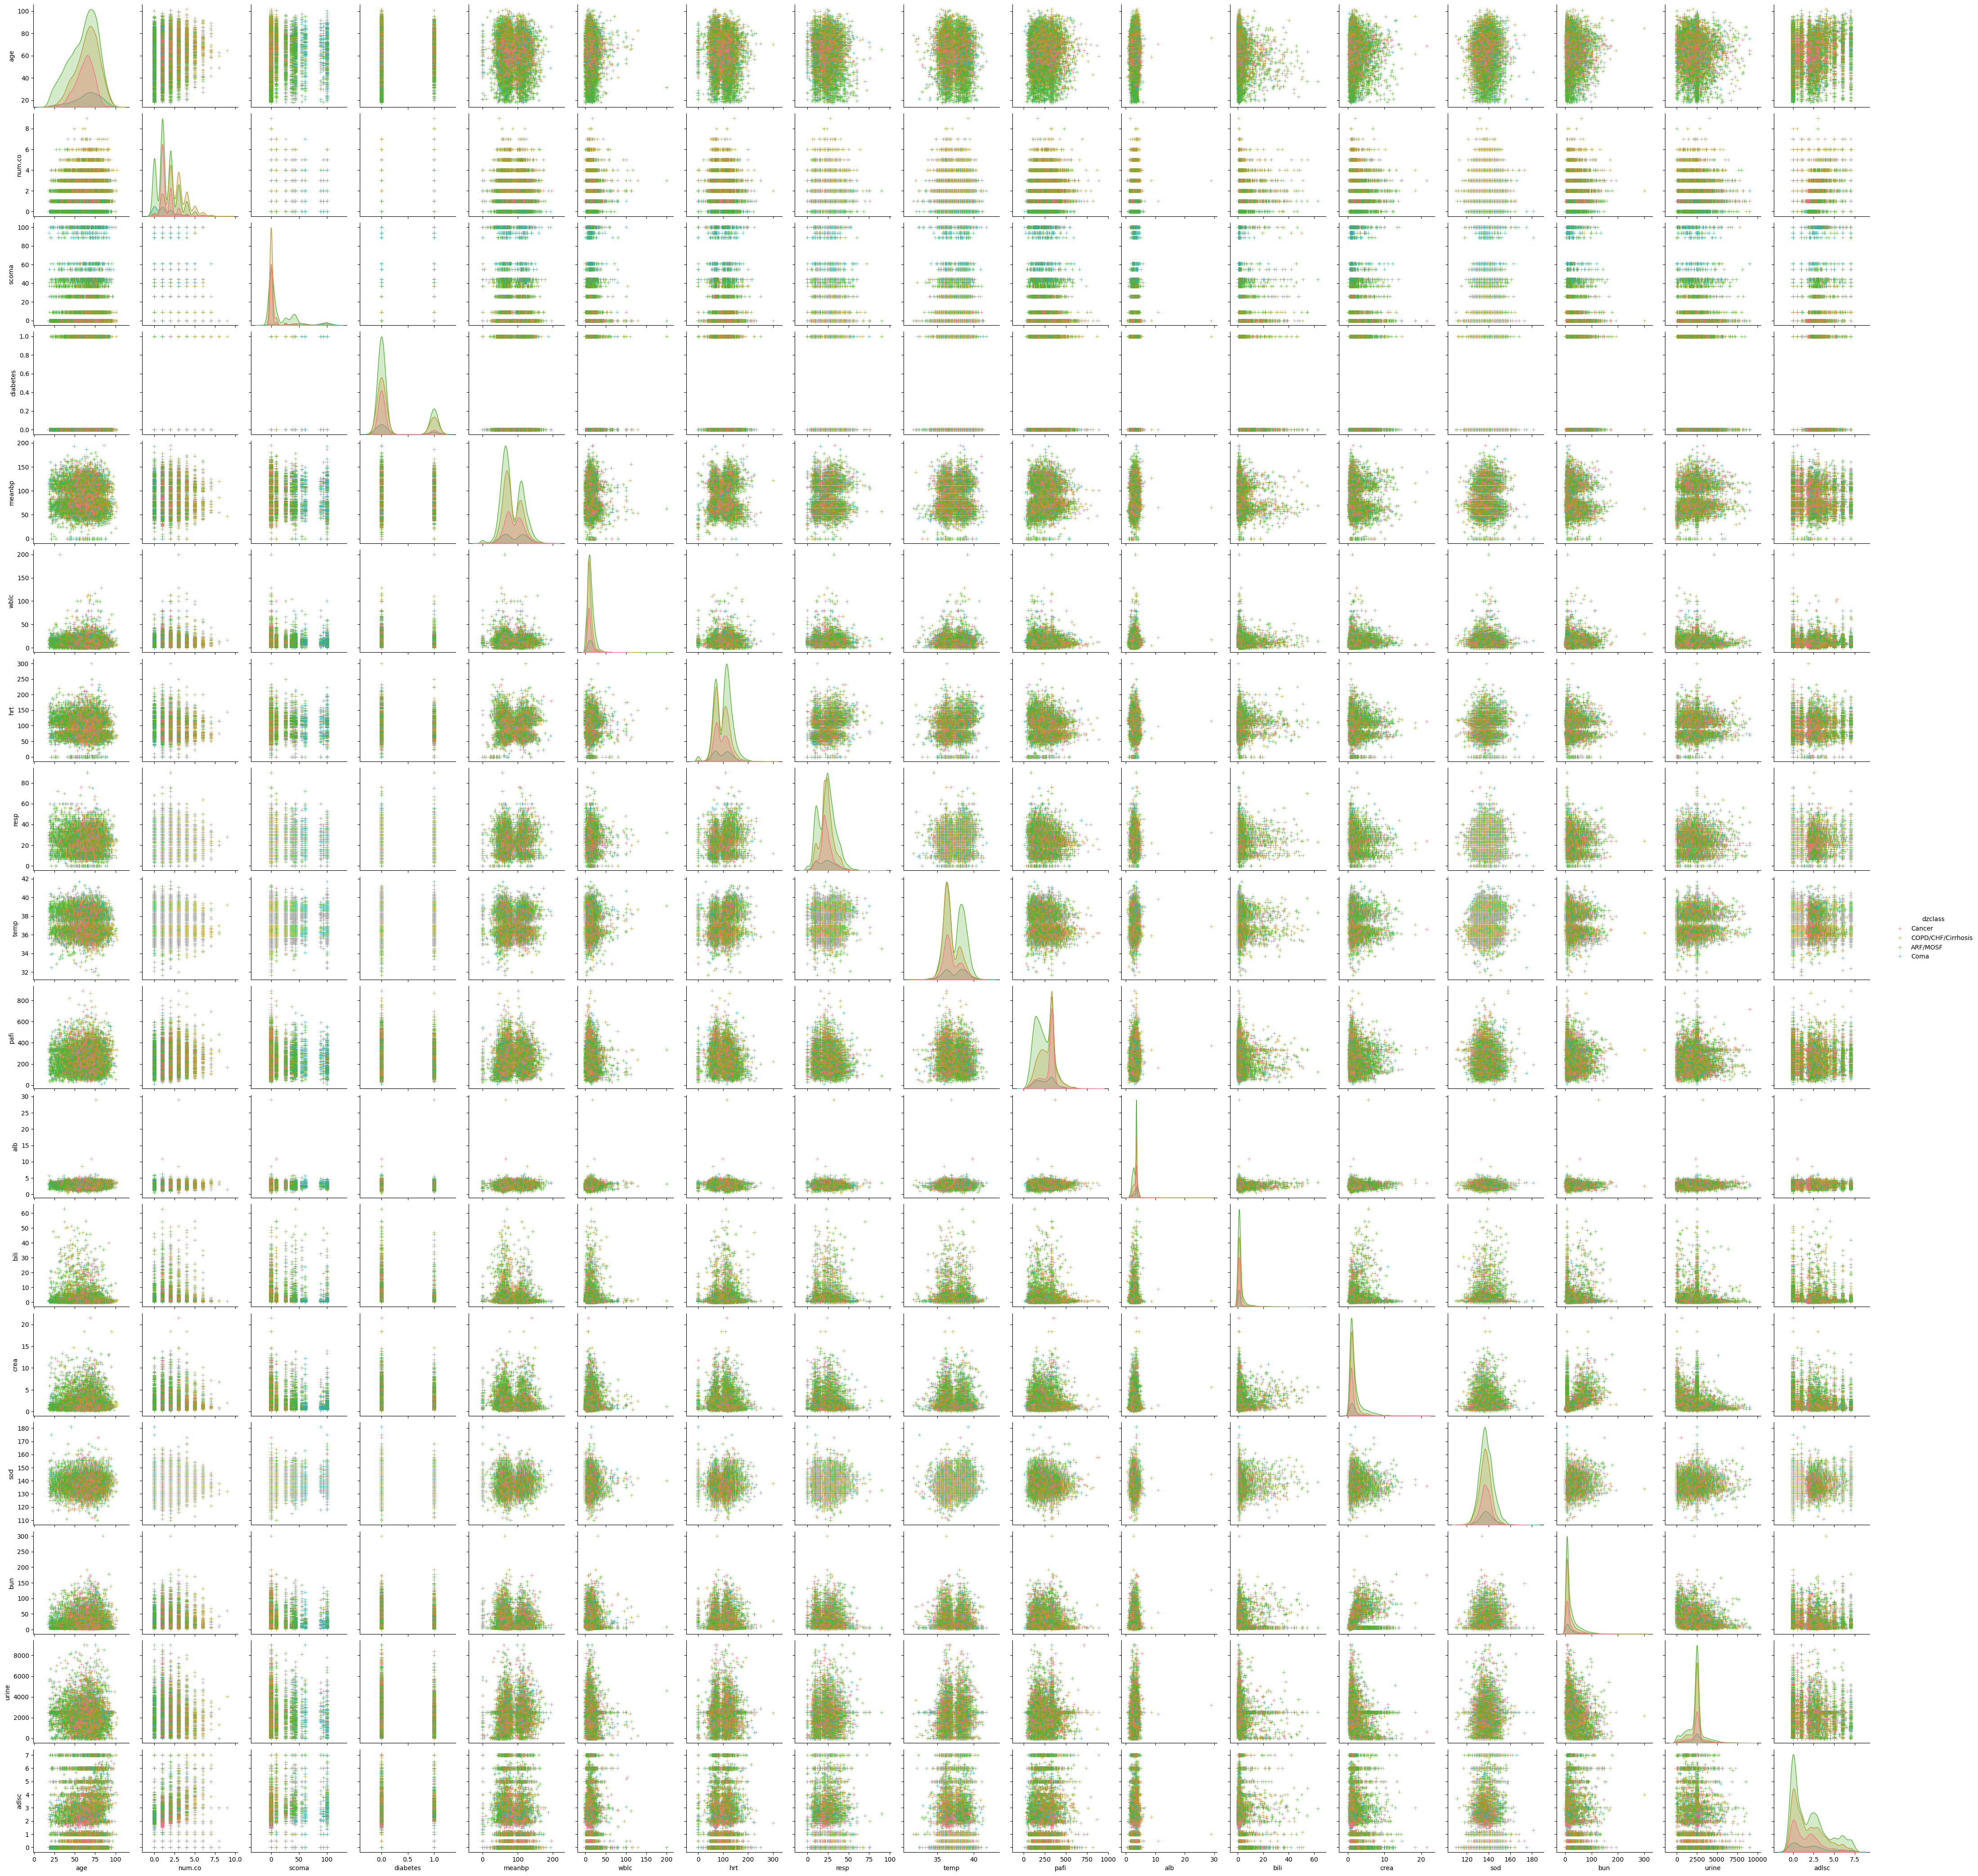

In [ ]:
sns.pairplot(X, hue='dzclass', markers='+')
plt.show()

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
X[['sex', 'race', 'diabetes', 'ca']] = enc.fit_transform(X[['sex', 'race', 'diabetes', 'ca']])
X.head()

<ipython-input-38-57e7efdb82b7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['sex', 'race', 'diabetes', 'ca']] = enc.fit_transform(X[['sex', 'race', 'diabetes', 'ca']])


age  sex             dzclass  num.co  scoma  race  diabetes   ca  \
0  62.84998  1.0              Cancer       0    0.0   3.0       0.0  0.0   
1  60.33899  0.0  COPD/CHF/Cirrhosis       2   44.0   4.0       0.0  1.0   
2  52.74698  0.0  COPD/CHF/Cirrhosis       2    0.0   4.0       0.0  1.0   
3  42.38498  0.0              Cancer       2    0.0   4.0       0.0  0.0   
4  79.88495  0.0            ARF/MOSF       1   26.0   4.0       0.0  1.0   

   meanbp       wblc  ...  resp      temp       pafi       alb      bili  \
0    97.0   6.000000  ...  22.0  36.00000  388.00000  1.799805  0.199982   
1    43.0  17.097656  ...  34.0  34.59375   98.00000  3.500000  1.010000   
2    70.0   8.500000  ...  28.0  37.39844  231.65625  3.500000  2.199707   
3    75.0   9.099609  ...  32.0  35.00000  333.30000  3.500000  1.010000   
4    59.0  13.500000  ...  20.0  37.89844  173.31250  3.500000  1.010000   

       crea    sod   bun   urine  adlsc  
0  1.199951  141.0  6.51  2502.0    7.0  
1  5.500000  132.0  6.51  2502.0    1.0  
2  2.000000  134.0  6.51  2502.0    0.0  
3  0.799927  139.0  6.51  2502.0    0.0  
4  0.799927  143.0  6.51  2502.0    2.0  

[5 rows x 21 columns]

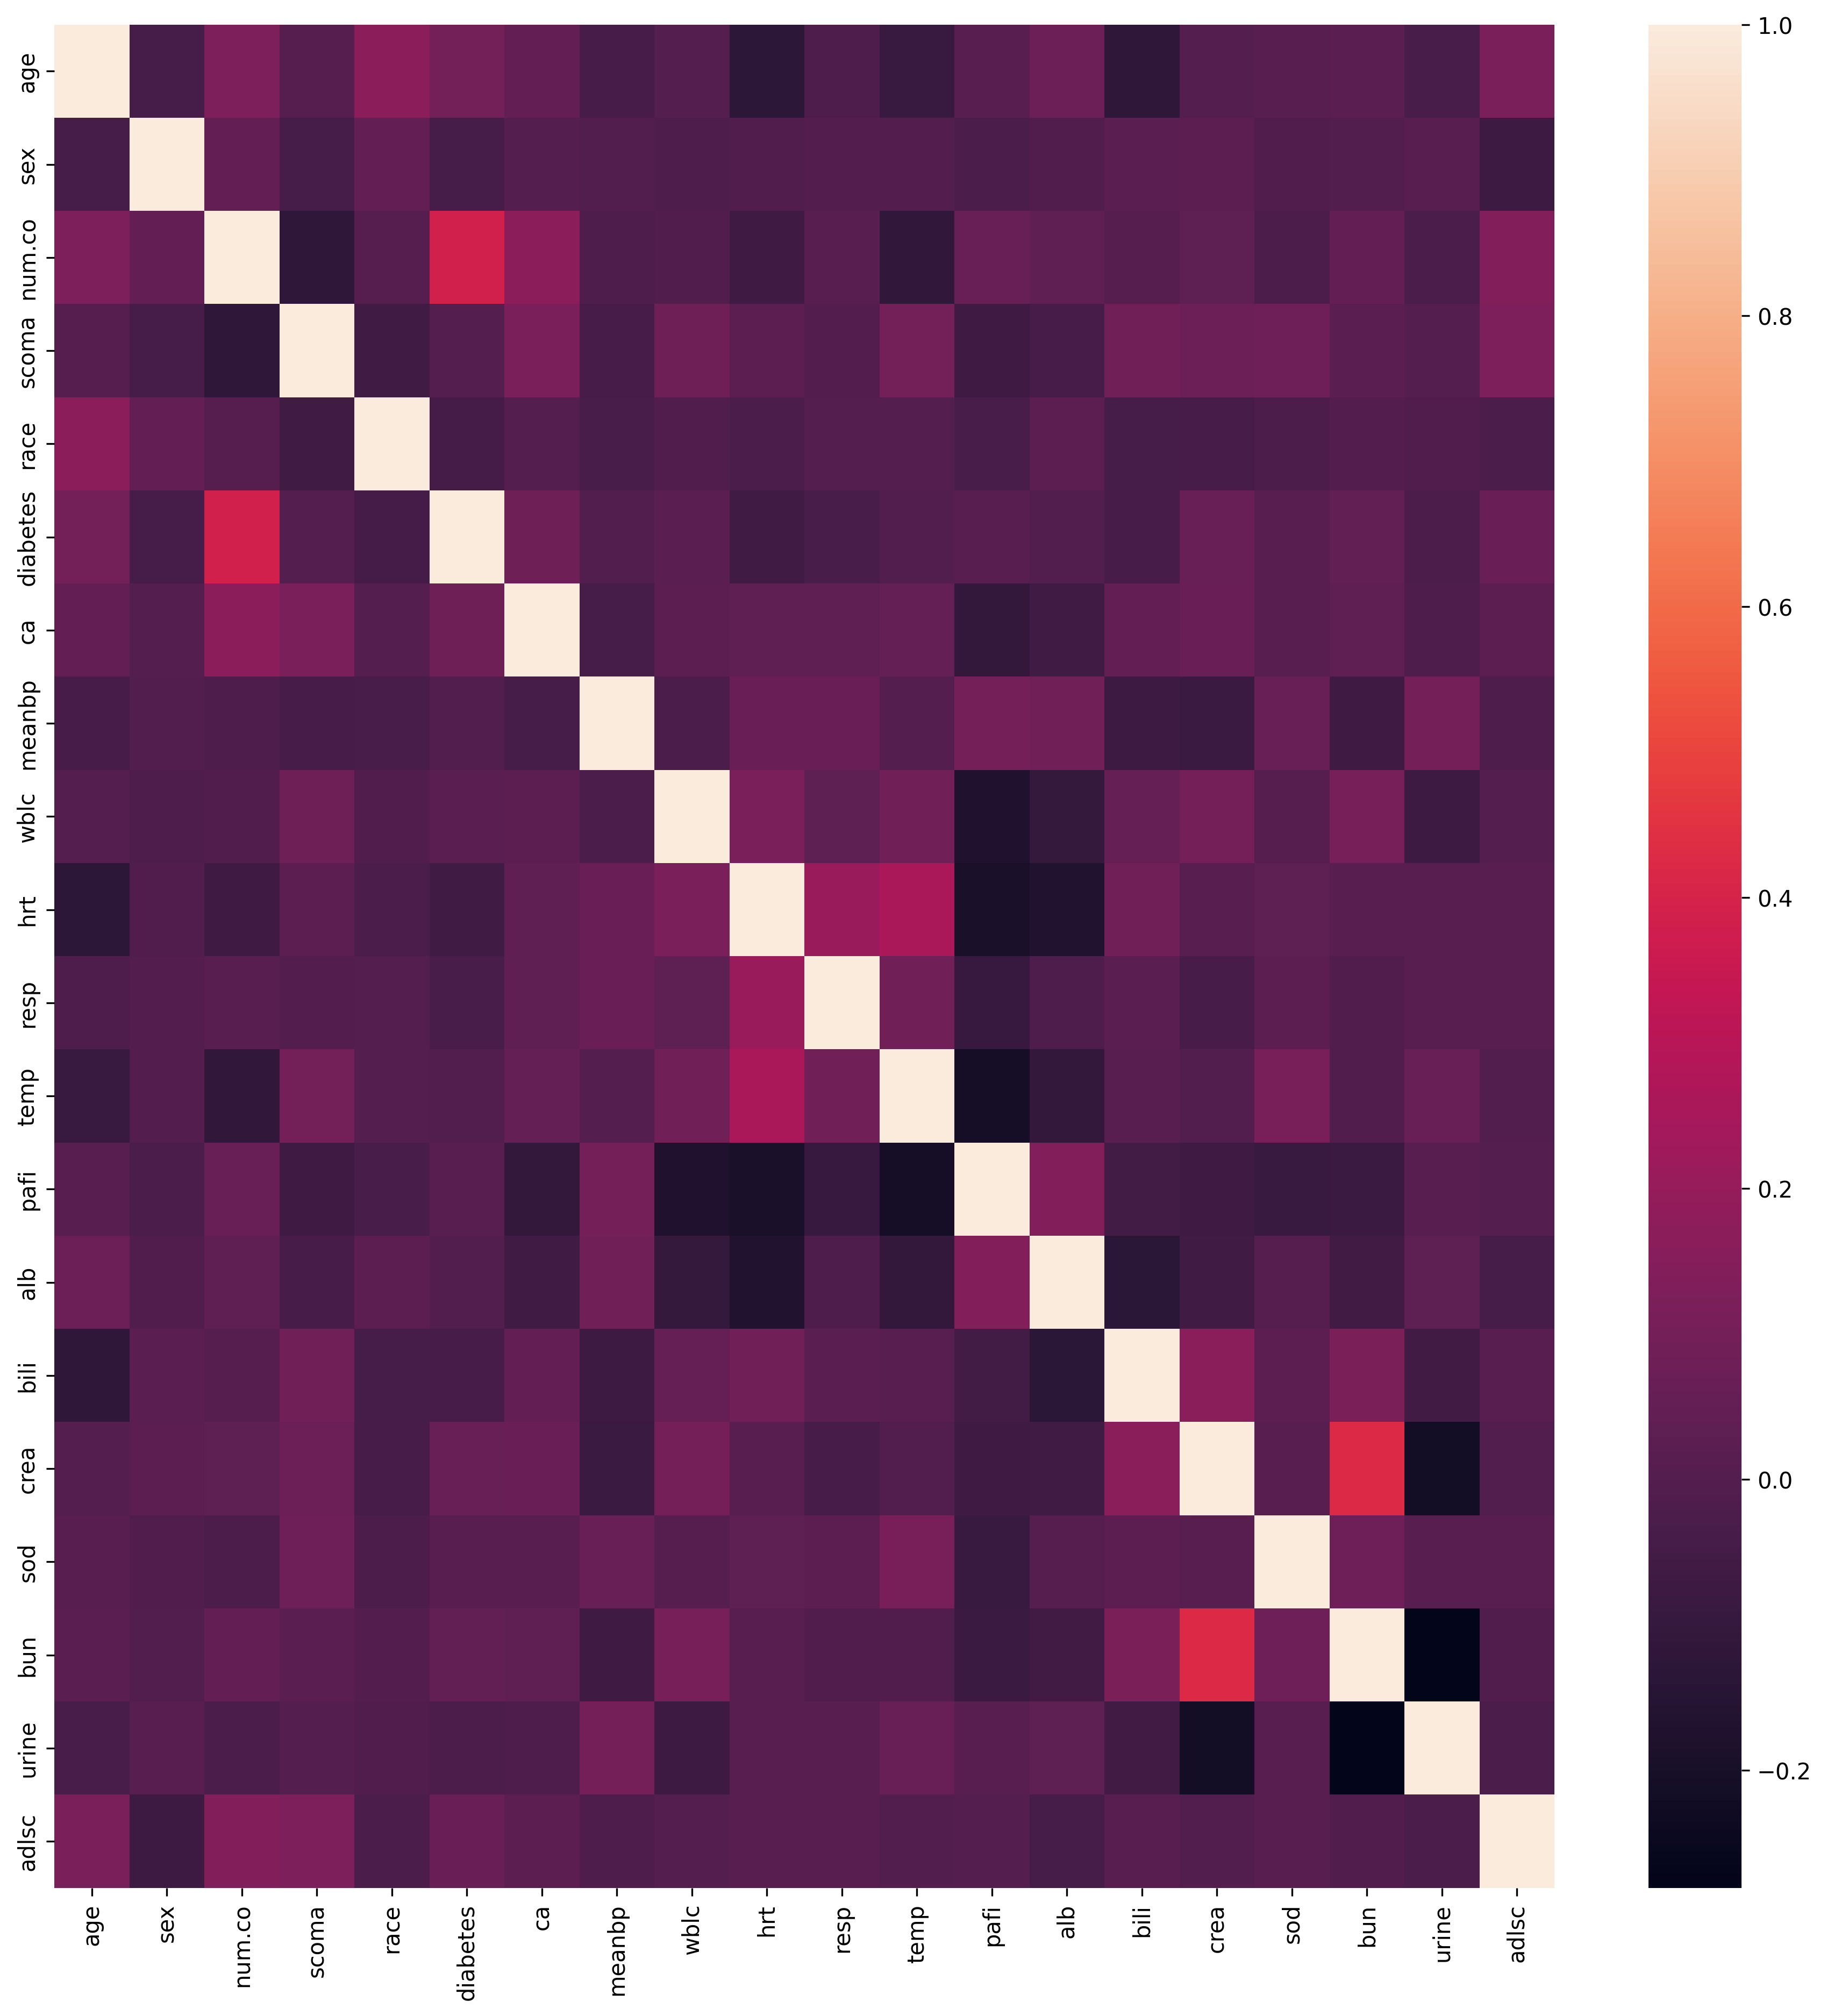

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 15), dpi=300)
sns.heatmap(X.corr(numeric_only = True));
plt.show()

In [ ]:
X1 = X.drop(['dzclass'], axis=1)
y = X['dzclass']
print(f'X shape: {X1.shape} | y shape: {y.shape} ')

X shape: (9061, 20) | y shape: (9061,) 


array(['Cancer', 'COPD/CHF/Cirrhosis', 'ARF/MOSF', 'Coma'], dtype=object)

In [ ]:
import scipy.stats as stats

y_mapped = y.map({'Cancer': 0, 'COPD/CHF/Cirrhosis': 1, 'ARF/MOSF': 2, 'Coma': 3})

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y_mapped, test_size=0.20, random_state=20, stratify=y_mapped)

stats.ttest_ind (a=y_train, b=y_test)

TtestResult(statistic=0.030079739837608376, pvalue=0.9760041213060482, df=9059.0)

In [ ]:
# создаем лист для тех моделей, которые будем изучать
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))

# оцениваем их метрики
results = []
model_names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  model_names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LR: 0.660598 (0.024883)
LDA: 0.734823 (0.019691)
KNN: 0.500969 (0.011909)
CART: 0.680192 (0.024099)
NB: 0.707778 (0.013343)
SVC: 0.465922 (0.001582)


In [ ]:
sk_lda = LinearDiscriminantAnalysis(solver='eigen')
sk_lda.fit(X_train, y_train)
sk_lda_pred_res = sk_lda.predict(X_test)
sk_transformed = sk_lda.transform(X_train)
sk_lda_accuracy = accuracy_score(y_test, sk_lda_pred_res)

print(f'sk LDA accuracy: {sk_lda_accuracy}')
print(f'sk LDA prediction: {sk_lda_pred_res}')
print('sk transformed features', sk_transformed[:5].T, sep='\n')

sk LDA accuracy: 0.749034749034749
sk LDA prediction: [2 2 3 ... 1 2 0]
sk transformed features
[[3.64938563 3.45189363 2.23675061 2.08928337 5.37606768]
 [3.43866173 3.26366654 1.63881163 1.95637636 2.82498876]
 [2.37243313 3.29310354 2.56667683 1.96782099 3.39642965]]


/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


<Axes: title={'center': 'LDA surface with original features'}>

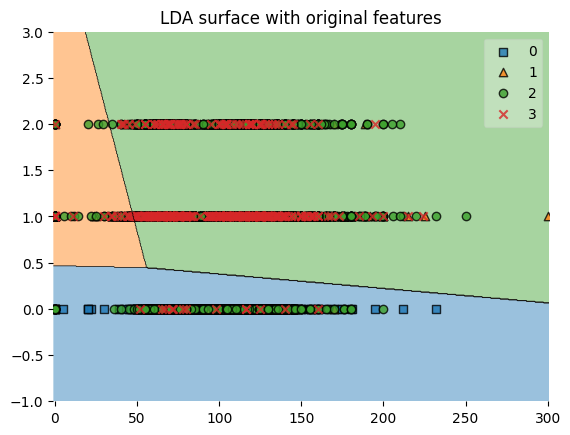

In [ ]:
from mlxtend.plotting import plot_decision_regions

# Создадим целевой вектор y_2d
y_s = y_train
X_2d= X_train[['hrt',	'ca']].values

y_2d = y_s.values


sk_lda1 = LinearDiscriminantAnalysis(solver='eigen')
sk_lda1.fit(X_2d, y_2d)

plt.title('LDA surface with original features')
plot_decision_regions(
    	X=X_2d,
    	y=y_2d,
    	clf=sk_lda1)

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('bl

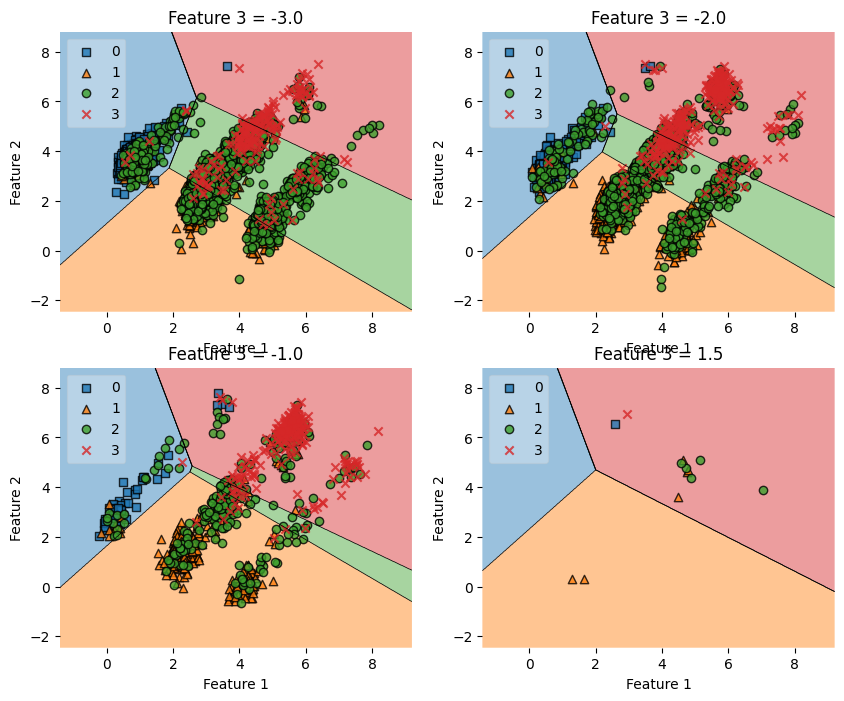

In [ ]:
df = X["dzclass"].map({'Cancer': 0, 'COPD/CHF/Cirrhosis': 1, 'ARF/MOSF': 2, 'Coma': 3})

Xs = X[['hrt',	'ca']]
ys = df.values

sk_lda2 = LinearDiscriminantAnalysis(solver='eigen')
X1_lda = sk_lda2.fit(X1, ys).transform(X1)

Xs = X1_lda

X1_lda_train, X1_lda_test, y1_train, y1_test = train_test_split(X1_lda, ys, random_state=0)

sk_lda2.fit(X1_lda_train, y1_train)

fig, axarr = plt.subplots(2, 2, figsize=(10,8), sharex=True, sharey=True)
values = [-3.0, -2.0, -1.0, 1.0]
width = 0.75
for value, ax in zip(values, axarr.flat):
    plot_decision_regions(X=X1_lda, y=ys, clf=sk_lda2, filler_feature_values={2: value}, filler_feature_ranges={2: width}, legend=2, ax=ax)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title('Feature 3 = {}'.format(value))

In [ ]:
'race',	'urine', 'meanbp', 'bili', 'crea', 'alb', 'bun', 'resp', 'hrt', 'ca', 'scoma', 'diabetes', 'adlsc', 'pafi'